# Projeto prático 4 - Redes Neurais Artificiais

Alunos do Curso de Sistemas de Informação (EST-UEA): 
- [Jackson Kelvin](https://github.com/jacksonks)
- [Jailson Pereira](https://github.com/jailsonpj)

# Descrição

Três variedades de trigo (Kama, Rosa e Canadian) possuem sementes muito parecidas,
entretanto diferentes. Um grupo de pesquisadores poloneses coletou 70 amostras de cada
tipo e, usando uma técnica particular de raio-X, coletou medidas geométricas destas
sementes, a citar: área, perímetro, compactude, comprimento, largura, coeficiente de
assimetria e comprimento do sulco da semente. O dataset detalhado contendo as medições
pode ser encontrado em: https://archive.ics.uci.edu/ml/datasets/seeds#

[PDF da descrição do projeto](https://github.com/jailsonpj/neural_network/blob/master/projetos_praticos/projeto-4/rna-2018.2-pp4.pdf)


# Bibliotecas necessárias no projeto

- Pandas
- Numpy
- Sklearn
- Matplotlib

# Importando bibliotecas e módulos necessário no projeto

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

Como requisito do Projeto, as redes serão construídas com um *busca em grade* utilizando o módulo GridSearchCV da Sklearn.

GridSearchCV implementa um método de “ajuste” e “pontuação”. Também implementa “predict”, “predict_proba”, “decision_function”, “transform” e “inverse_transform” se eles forem implementados no estimador usado.

Os parâmetros do estimador usados para aplicar esses métodos são otimizados pela pesquisa de grade com validação cruzada sobre uma grade de parâmetros.



# Visualização dos Dados

In [2]:
data = pd.read_csv('seeds_dataset.txt',delimiter='\t',header=None,names=['A','P','C','comp_nuc','lar_nuc','coe_ass','comp_sulco','target_alvo'])

In [3]:
data.head(5)

,A,P,C,comp_nuc,lar_nuc,coe_ass,comp_sulco,target_alvo
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


**Os dados são composto por 7 preditores e um 1 atributo alvo:**

**- Atributos preditores:**
    - Área (A)
    - Perímetro (P)
    - Compactação (C)
    - Comprimento do Núcleo (comp_nuc)
    - Largura do Núcleo (lar_nuc)
    - Coeficiente de assimetria (coe_ass)
    - Comprimento do sulco do núcleo (comp_sulco)
**- Atributo Alvo:**
    - Target Alvo

In [4]:
data.columns

Index(['A', 'P', 'C', 'comp_nuc', 'lar_nuc', 'coe_ass', 'comp_sulco',
       'target_alvo'],
      dtype='object')

## Limpeza de dados - retirando dados faltantes:

In [5]:
#limpando dados
data_novo = data.dropna(axis=0)

In [6]:
data_novo.head(5)

,A,P,C,comp_nuc,lar_nuc,coe_ass,comp_sulco,target_alvo
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


## visualizando distribuição de dados:

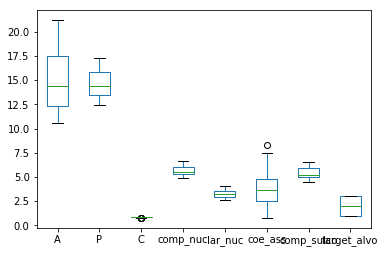

In [7]:
data_novo.plot.box(['target_alvo'])

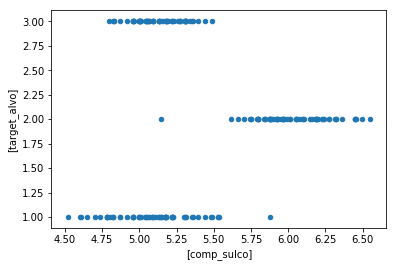

In [8]:
data_novo.plot.scatter(['comp_sulco'],['target_alvo'])

# Separando rótulos do conjunto de dados para treinamento

In [10]:
# separando target
y = data_novo['target_alvo']
X = data_novo.drop('target_alvo',axis=1)


In [11]:

X.head()

,A,P,C,comp_nuc,lar_nuc,coe_ass,comp_sulco
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


# Para 3 neurônios nas camadas ocultas

In [11]:
#MLPClassifier(hidden_layer_sizes=(lista[i],),activation='relu', max_iter=20, alpha=1e-4,batch_size=1,
#                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
#                    learning_rate_init=0.001)

In [66]:
#0.5
param1 = {'hidden_layer_sizes':[(1,1),(2,)],'activation':['relu','tanh'],'learning_rate_init':[0.01,0.1,0.001]}

#2
param2 = {'hidden_layer_sizes':[(1,3),(4,),(2,2),(3,1)],'activation':['relu','tanh','identity'],'learning_rate_init':[0.01,0.1,0.001]}

In [67]:
model = MLPClassifier(solver='lbfgs')

In [68]:
clf = GridSearchCV(model,param2,cv=3)

In [69]:
clf.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(1, 3), (4,), (2, 2), (3, 1)], 'activation': ['relu', 'tanh', 'identity'], 'learning_rate_init': [0.01, 0.1, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
predict = clf.predict(X)

In [71]:
len(predict)

199

In [72]:
accuracy_score(y,predict)

0.9849246231155779

Observação: o solver padrão "adam" funciona muito bem em conjuntos de dados relativamente grandes (com milhares de amostras de treinamento ou mais) em termos de tempo de treinamento e pontuação de validação. No entanto, para conjuntos de dados pequenos, os "lbfgs" podem convergir mais rapidamente e ter melhor desempenho.


In [65]:
import math

In [92]:
a  = pow(14,0.5)

In [93]:
print(a*2)

7.483314773547883
